In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
#Setting the filepath and loading in a shapefile
file = "./files/countries.shp"
map_df = gpd.read_file(file)

#Loading the datasets & doing some data processing like column re-naming
df = pd.read_csv('./files/index.csv')
lang = pd.read_csv('./files/languages.csv', encoding = 'cp1252')
lang.columns = ['lang_id', 'code', 'language_name', 'perc_of_people_spoken', 'official']
countries = pd.read_csv('./files/countries.csv', encoding = 'cp1252')
countries.columns = ['country_name', 'iso_2', 'code']
df.columns = ['rank', 'code', 'country', 'ethnic_index', 'cultural_index']
regions = pd.read_csv('./files/regions.csv')
#Merging shp and file with the cultural index file to build a map based on the data
#As every language is in a separate row, aggregating the languages, % of people spoken and the language status
merged_index = map_df.set_index('ADM0_A3').join(df.set_index('code')).reset_index()
lang['aggregated'] = lang.iloc[:,2]+' (' + lang.iloc[:,3].astype(str) + '; ' +lang.iloc[:,4] + ')'
pvt = lang[['lang_id','code','aggregated']].pivot_table(index = 'code',columns = 'aggregated')
final_aggreg = pd.DataFrame(pvt.apply(lambda x: x.dropna().reset_index()['aggregated'].tolist(), axis = 1)).reset_index()
final_aggreg.columns = ['code', 'lang']
merged_lang = merged_index.set_index('ADM0_A3').join(final_aggreg.set_index('code')).reset_index()

,ADM0_A3,ADMIN,ABBREV,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,...,latStart,lonStart,latEnd,lonEnd,geometry,rank,country,ethnic_index,cultural_index,lang
0,ZWE,Zimbabwe,Zimb.,13805084,28330.0,2017,2002,2016,5. Emerging region: G20,5. Low income,...,None,None,None,None,POLYGON ((31.28789062500002 -22.40205078125001...,101.0,Zimbabwe,0.366,0.141,"[Chewa (nan; yes), Chibarwe (nan; yes), Englis..."
1,ZMB,Zambia,Zambia,15972000,65170.0,2017,2010,2016,7. Least developed region,4. Lower middle income,...,None,None,None,None,"POLYGON ((30.39609375000001 -15.64306640625, 3...",35.0,Zambia,0.726,0.189,"[Bembe (33.4; no), Bisa (1.0; no), Chewa (4.5;..."
2,YEM,Yemen,Yem.,28036829,73450.0,2017,2004,2016,7. Least developed region,4. Lower middle income,...,None,None,None,None,"(POLYGON ((53.08564453125001 16.648388671875, ...",150.0,Yemen,0.078,0.078,[Arabic (nan; yes)]
3,VNM,Vietnam,Viet.,96160163,594900.0,2017,2009,2016,5. Emerging region: G20,4. Lower middle income,...,None,None,None,None,"(POLYGON ((104.06396484375 10.3908203125, 104....",122.0,Vietnam,0.233,0.210,"[English (nan; no), Other (nan; no), Vietnames..."
4,VEN,Venezuela,Ven.,31304016,468600.0,2017,2001,2016,5. Emerging region: G20,3. Upper middle income,...,None,None,None,None,(POLYGON ((-60.82119140624999 9.13837890624999...,88.0,Venezuela,0.483,0.020,"[Spanish (nan; yes), indigenous (nan; no)]"


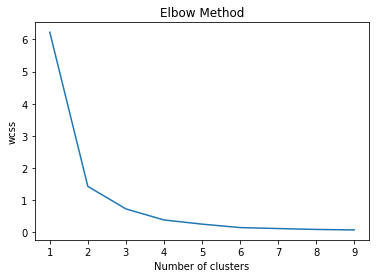

In [42]:
x = df[['cultural_index']].dropna()
wcss = []
for i in range(1, 10):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [64]:
##Fitting kmeans to the dataset with k=4
km4 = KMeans(n_clusters = 4, random_state = 0)
y_means4 = km4.fit_predict(x)

km5 = KMeans(n_clusters = 5, random_state = 0)
y_means5 = km5.fit_predict(x)

pd.DataFrame(index = x.index, data = y_means4).join(x).groupby(0).count()

,cultural_index
0,
0,37
1,36
2,45
3,31
